In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('weatherAUS.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.shape

(145460, 23)

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
#Check null values..
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
#  Null values of float fill by median and null values of object fill by 'unknown'. 

min_temp=df.MinTemp.median()
df.MinTemp.fillna(min_temp, inplace=True)
max_temp=df.MaxTemp.median()
df.MaxTemp.fillna(max_temp, inplace=True)
rain_fall=df.Rainfall.median()
df.Rainfall.fillna(rain_fall, inplace=True)
evaporation=df.Evaporation.median()
df.Evaporation.fillna(evaporation, inplace=True)
sunshine=df.Sunshine.median()
df.Sunshine.fillna(sunshine,inplace=True)
windgustspeed=df.WindGustSpeed.median()
df.WindGustSpeed.fillna(windgustspeed,inplace=True)
windspeed9am=df.WindSpeed9am.median()
df.WindSpeed9am.fillna(windspeed9am,inplace=True)
windspeed3pm=df.WindSpeed3pm.median()
df.WindSpeed3pm.fillna(windspeed3pm,inplace=True)
humidity9am=df.Humidity9am.median()
df.Humidity9am.fillna(humidity9am,inplace=True)
humidity3pm=df.Humidity3pm.median()
df.Humidity3pm.fillna(humidity3pm,inplace=True)
pressure9am=df.Pressure9am.median()
df.Pressure9am.fillna(pressure9am,inplace=True)
pressure3pm=df.Pressure3pm.median()
df.Pressure3pm.fillna(pressure3pm,inplace=True)
cloud9am=df.Cloud9am.median()
df.Cloud9am.fillna(cloud9am,inplace=True)
cloud3pm=df.Cloud3pm.median()
df.Cloud3pm.fillna(cloud3pm,inplace=True)
temp9am=df.Temp9am.median()
df.Temp9am.fillna(temp9am,inplace=True)
temp3pm=df.Temp3pm.median()
df.Temp3pm.fillna(temp3pm,inplace=True)

df.RainToday.fillna('unknown',inplace=True)
df.RainTomorrow.fillna('unknown',inplace=True)
df.WindDir9am.fillna('unknown',inplace=True)
df.WindDir3pm.fillna('unknown',inplace=True)
df.WindGustDir.fillna('unknown',inplace=True)





In [10]:
# Fill the null value.
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [11]:
# Describe.
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.192053,23.215962,2.307990,5.179779,7.989889,39.962189,14.030751,18.669758,68.901251,51.553396,1017.644768,1015.250115,4.659755,4.709913,16.987101,21.668916
std,6.365780,7.088358,8.389771,3.178819,2.757790,13.120931,8.861796,8.716716,18.855360,20.471345,6.728484,6.663994,2.281490,2.106768,6.449299,6.850658
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.600000,5.200000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [12]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,4.8,8.4,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


<AxesSubplot:>

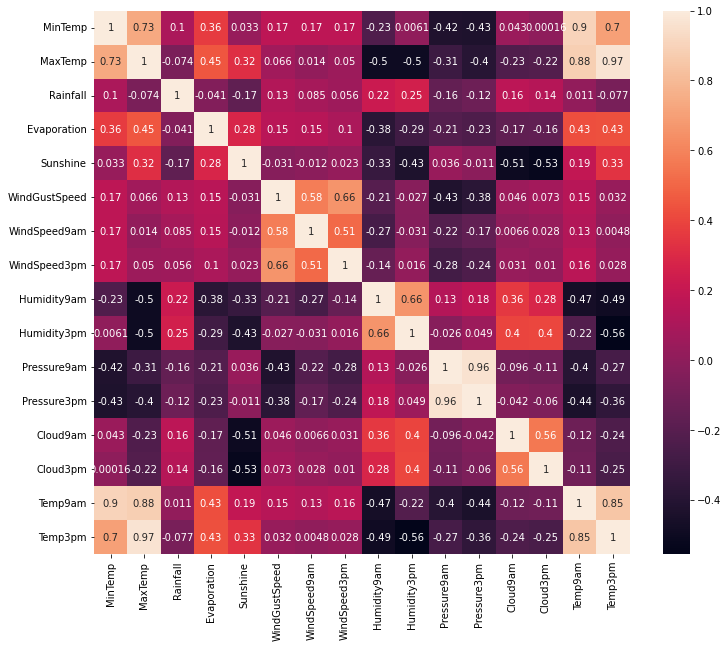

In [13]:
# Exploratory data analysis.
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [14]:
# Making target variable and independent variable.

In [15]:
x = df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']]

In [16]:
x.shape

(145460, 16)

In [17]:
y = df.RainTomorrow

In [18]:
y.shape

(145460,)

In [19]:
# Encoding.

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()

In [22]:
y = le.fit_transform(df.RainTomorrow)

In [23]:
y

array([0, 0, 0, ..., 0, 0, 2])

In [24]:
# Splitting data in to training testing data.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,
                                                 random_state=101,stratify=y)

In [27]:
x_train.shape

(87276, 16)

In [28]:
x_test.shape

(58184, 16)

In [29]:
#Feature scaling.

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
x_train=scaler.fit_transform(x_train)
x_train

array([[0.28537736, 0.39130435, 0.        , ..., 0.55555556, 0.29957806,
        0.38387716],
       [0.51179245, 0.58601134, 0.        , ..., 0.55555556, 0.62025316,
        0.58925144],
       [0.48349057, 0.47637051, 0.        , ..., 0.55555556, 0.5       ,
        0.48368522],
       ...,
       [0.29716981, 0.33837429, 0.00380849, ..., 0.55555556, 0.28902954,
        0.3512476 ],
       [0.58962264, 0.62759924, 0.        , ..., 0.33333333, 0.61814346,
        0.62380038],
       [0.70283019, 0.74480151, 0.        , ..., 0.66666667, 0.71518987,
        0.74664107]])

In [32]:
x_test=scaler.transform(x_test)
x_test

array([[0.32783019, 0.33459357, 0.04189336, ..., 0.77777778, 0.35654008,
        0.29942418],
       [0.55660377, 0.52173913, 0.01332971, ..., 0.66666667, 0.51054852,
        0.51439539],
       [0.41037736, 0.37996219, 0.0054407 , ..., 0.66666667, 0.407173  ,
        0.37236084],
       ...,
       [0.48349057, 0.60302457, 0.        , ..., 0.55555556, 0.53797468,
        0.61420345],
       [0.52358491, 0.536862  , 0.        , ..., 0.55555556, 0.46202532,
        0.52975048],
       [0.3490566 , 0.60113422, 0.        , ..., 0.55555556, 0.47046414,
        0.60652591]])

In [33]:
# Logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
log = LogisticRegression()

In [36]:
log.fit(x_train,y_train)

LogisticRegression()

In [37]:
y_pred=log.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_pred,y_test).round(2)

0.82

In [40]:
##linear regression.

In [41]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [42]:
lr.fit(x_train,y_train)

LinearRegression()

In [43]:
y_pred=lr.predict(x_test)

In [44]:
y_pred

array([ 0.65541195,  0.38747965,  0.41857316, ...,  0.02287098,
        0.17578817, -0.00438553])

In [45]:
# Decision tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt


DecisionTreeClassifier()

In [47]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
y_pred = dt.predict(x_test)

In [49]:
accuracy_score(y_pred,y_test).round(2)

0.76

In [50]:
#KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
kn=KNeighborsClassifier(n_neighbors=6)

In [53]:
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [54]:
y_pred=kn.predict(x_test)

In [55]:
accuracy_score(y_test,y_pred).round(2)

0.82

In [56]:
#SVM

In [57]:
from sklearn.svm import SVC

In [58]:
svc=SVC()

In [59]:
svc.fit(x_train,y_train)

SVC()

In [60]:
y_pred=svc.predict(x_test)

In [61]:
accuracy_score(y_pred,y_test).round(2)

0.82